## Challenge 1: Do Referral Bonuses Work?

The Modal Times, a subscription-based newspaper, ran an experiment a few months ago to test whether referral bonuses could help them increase their subscriber base. 

The marketing team selected a random sample of 1000 current subscribers to take part in the experiment. Details of the experiment are listed below:

- The 1000 randomly sampled subscribers were split into two groups: 
    - 500 of them were encouraged to refer friends and family, but were given no financial incentive to do so
    - The other 500 were offered either 5, 10, 15, or 20 dollars off their bill per successful referral during the 90 day experiment
- A referral was "successful" if the referred person subscribed to the newspaper
- To make a referral, a subscriber submitted their friend or family member's name and contact information using an online form
- The experiment lasted 90 days; subscribers were only paid for successful referrals during this period

Your job is to help the Modal Times team explore the results of their experiment to understand whether (and when!) referral bonuses work to bring in new subscribers.

The data from this experiment is described in the data dictionary below.

### Instructions

1. Load and inspect the data. Are there any outliers or missing data? Do you have hypotheses or follow-up questions about any anomylies that you found?
2. What can you learn about Modal Times subscribers based on these data? Use summary statistics and data visualizations to describe the subscriber base.
3. Do referral bonuses work? Use summary statistics and/or data visualizations to make your case.
4. Does the amount of the referral bonus matter? Use summary statistics and/or data visualizations to make your case.
5. Is there any evidence that particular subgroups of subscribers are more likely to refer a friend? Look into at least one characteristic (eg., age, student discount, subscription type, online activity, or subscription length) and investigate whether this characteristic was associated with the amount of referrals that the person made.

### Consider

- What does it mean for a referral bonus to work? Are there multiple ways to define success in this experiment?
- What kinds of data visualizations and summary statistics are most appropriate for the data types and business questions that you are trying to answer?
- What kinds of questions might you want to explore in future experiments?

### Submit Your Work
- Submit your findings in this Jupyter notebook; you should include markdown or comments to describe your findings along with the code and output.

### Data Dictionary

Data is saved as `bonus_experiment.csv` and contains the following fields:

- `age`: age of the subscriber
- `stud_disc`: whether or not the subscriber has a student discount to pay for their subscription
- `sub_type`: subscription type (yearly or monthly)
- `active_mins`: average monthly "active" minutes on the online version of the newspaper. For readers who have been subscribed for less than one month, this is estimated.
- `sub_length`: the number of days that the reader has been subscribed to the newspaper prior to the experiment
- `bonus`: the referral bonus amount that was offered to the subscriber per successful referral
- `num_shared`: the number of times the subscriber attempted to refer someone during the experimental period
- `num_success`: the number of those attempted referrals that were successful during the experimental period (the referred person subscribed)
- `shared`: indicates whether the subscriber attempted to refer anyone during the experimental period (`True` if `num_shared` is greater than 0 and `False` otherwise)

Importing needed libraries

In [1]:
# YOUR WORK AND CODE BELOW HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data and seeing a sample

In [2]:
df = pd.read_csv('bonus_experiment.csv')
print(df.shape)
df.head()

(1000, 9)


,age,stud_disc,sub_type,active_mins,sub_length,bonus,num_shared,num_success,shared
0,19.0,yes,yearly,45.4,81,10,24,7,True
1,22.0,yes,monthly,34.3,38,15,8,1,True
2,19.0,yes,monthly,30.1,18,15,12,5,True
3,23.0,yes,monthly,6.8,44,0,0,0,False
4,15.0,yes,yearly,20.4,124,5,5,2,True


Getting needed info as data type and number of non nulls

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          994 non-null    float64
 1   stud_disc    1000 non-null   object 
 2   sub_type     1000 non-null   object 
 3   active_mins  1000 non-null   float64
 4   sub_length   1000 non-null   int64  
 5   bonus        1000 non-null   int64  
 6   num_shared   1000 non-null   int64  
 7   num_success  1000 non-null   int64  
 8   shared       1000 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 63.6+ KB


Filling nulls with `interpolate()` function

In [4]:
df.interpolate(method = 'linear',inplace = True)

Getting additional statistical data describtion

In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1000.0,NaN,NaN,NaN,40.335,14.775066,13.0,25.0,43.0,53.0,75.0
stud_disc,1000,2,no,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_type,1000,2,monthly,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_mins,1000.0,NaN,NaN,NaN,30.4939,46.765884,0.0,19.3,29.15,38.1,1005.2
sub_length,1000.0,NaN,NaN,NaN,73.583,61.961168,1.0,31.0,53.0,92.0,322.0
bonus,1000.0,NaN,NaN,NaN,6.25,7.3988,0.0,0.0,2.5,11.25,20.0
num_shared,1000.0,NaN,NaN,NaN,5.246,6.349945,0.0,0.0,3.0,9.0,34.0
num_success,1000.0,NaN,NaN,NaN,1.691,2.492736,0.0,0.0,1.0,3.0,16.0
shared,1000,2,True,622,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
numerical_cols = ['age','active_mins','sub_length','bonus','num_shared','num_success']
categorical = ['stud_disc','sub_type','shared']

seeing the relationship between bonus and number of success (there is a relation between bonus and the number of successful referals)

<AxesSubplot:xlabel='bonus', ylabel='num_success'>

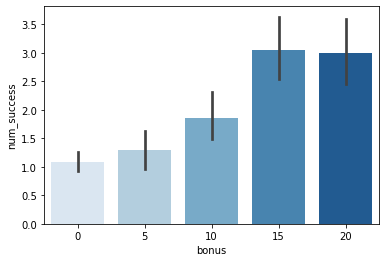

In [7]:
sns.barplot(x='bonus',y='num_success',data = df,palette = 'Blues')

In addtion to that, students that had student discount are more likely to succeed in referals

<AxesSubplot:xlabel='bonus', ylabel='num_success'>

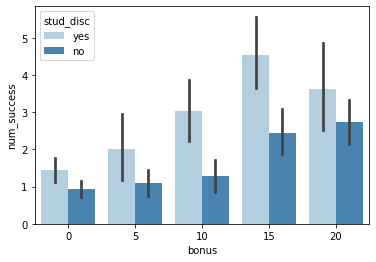

In [8]:
sns.barplot(x='bonus',y='num_success',hue = 'stud_disc', data = df,palette = 'Blues')

We also can observe that yearly subscribes refer more thus succeed more in referals , so there is a positive correlation between number of shares and number of success in addition to that , yearly subscribers tend to refer more often

<AxesSubplot:xlabel='num_shared', ylabel='num_success'>

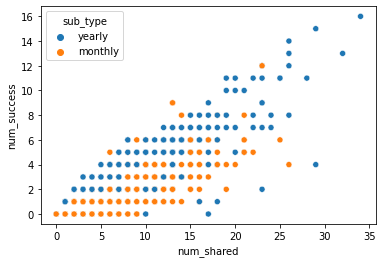

In [9]:
sns.scatterplot(x='num_shared',y= 'num_success',hue = 'sub_type',data = df)

In [10]:
x = df.corr() 

<AxesSubplot:>

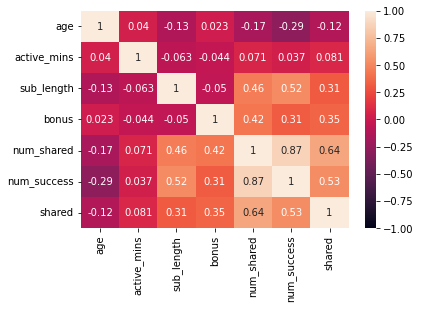

In [11]:
sns.heatmap(x,vmin = -1 , vmax = 1 ,annot = True)

There is outliers present in (sub_length,num_shared,num_success,active_mins)

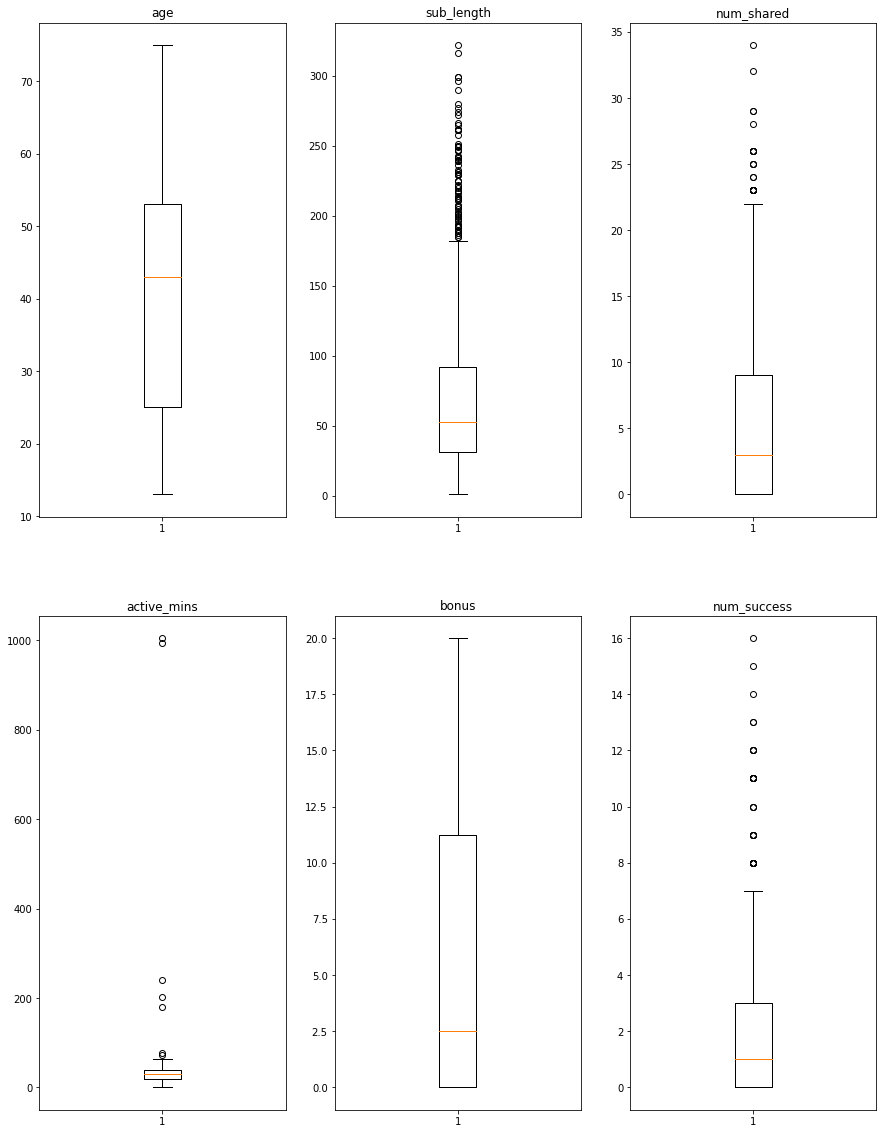

In [12]:
figure,axis = plt.subplots(2,3,figsize=(15,20))
r = 0
c = 0
for col in numerical_cols :
    axis[r][c].boxplot(df[col])
    axis[r][c].set_title(str(col))
    r += 1
    if r == 2:
        r = 0
        c +=1


<AxesSubplot:xlabel='bonus', ylabel='sub_length'>

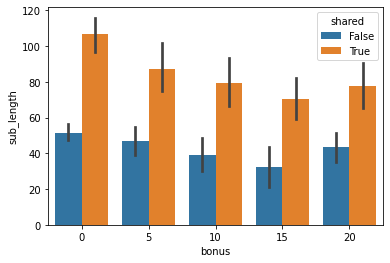

In [13]:
sns.barplot(x='bonus',y='sub_length',hue = 'shared',data = df)